# Part II - (Prosper Loan Data)
## by (Sakthi)


## Investigation Overview

> The overall goal is to provide plots that will be like a summary of the steps followed in Part 1.
> The underlying theme is to prove that the ProsperScore and ProsperRating (numeric) are strongly related. 


## Dataset Overview

> I choose ProsperLoanData. It has 113937 rows and 81 columns

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## (Visualization 1)

> I plot the loan status represented in proportions. For this purpose I make use of color, order
> I extract the labels and plot it

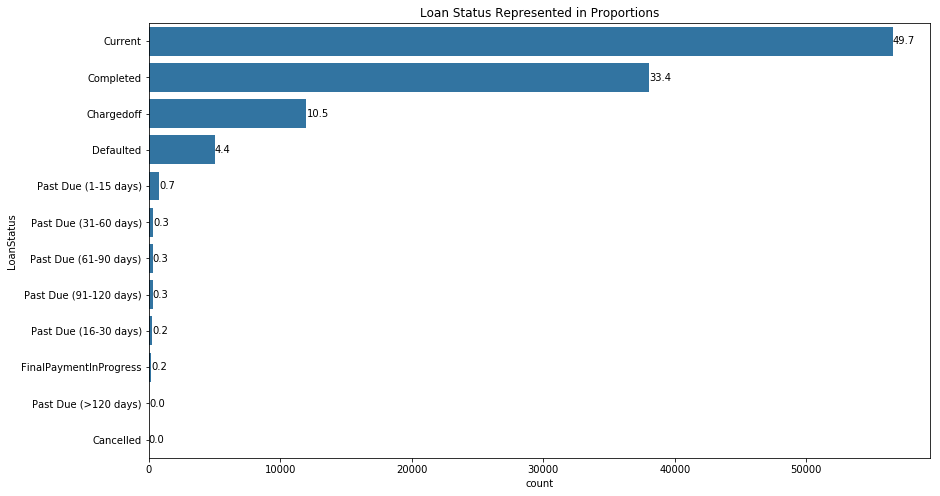

In [3]:
# Getting the count, sum, and index of 'LoanStatus'
loan_status_count = df['LoanStatus'].value_counts()
loan_status_total = df['LoanStatus'].value_counts().sum()
loan_status_index = df['LoanStatus'].value_counts().index


# Setting the base color 
base_color = sb.color_palette()[0]

plt.figure(figsize=[14, 8])

sb.countplot(data = df, y = 'LoanStatus', color = base_color, order = loan_status_index)

plt.title('Loan Status Represented in Proportions')

# Logic to print the proportion text on the bars
for i in range(loan_status_count.shape[0]):
    count = loan_status_count[i]
    
    # convert count into percentage and then into string
    
    pct_string = '{:0.1f}'.format(100 * count / loan_status_total)
    
    # print the string value on the bar
    plt.text(count + 1, i, pct_string, va='center')


## (Visualization 2)

> I plot the histogram of ProsperScore

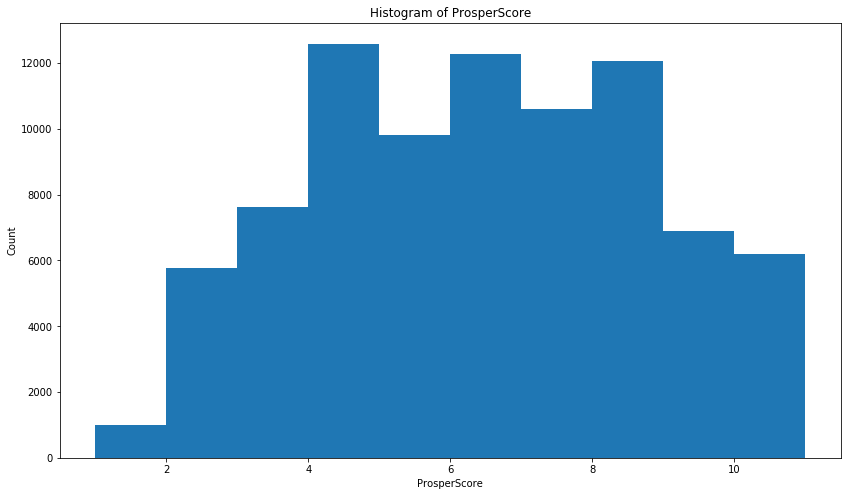

In [4]:
# Filling ProsperScore Na with 0
df['ProsperScore'] = df['ProsperScore'].fillna(0)
# Changing ProsperScore to int
df['ProsperScore'] = df['ProsperScore'].astype(int)

plt.figure(figsize= [14,8])

bins = np.arange(1, df['ProsperScore'].max()+1, 1)
plt.title('Histogram of ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('Count')
plt.hist(data = df, x='ProsperScore', bins = bins);

## (Visualization 3)
> Making use of FacetGrid and regplot and plot ProsperScore, ProsperRating (numeric), against LoanStatusCategorical
> For the purpose of visualization convert the LoanStatus of object type to LoanStatusCategorical


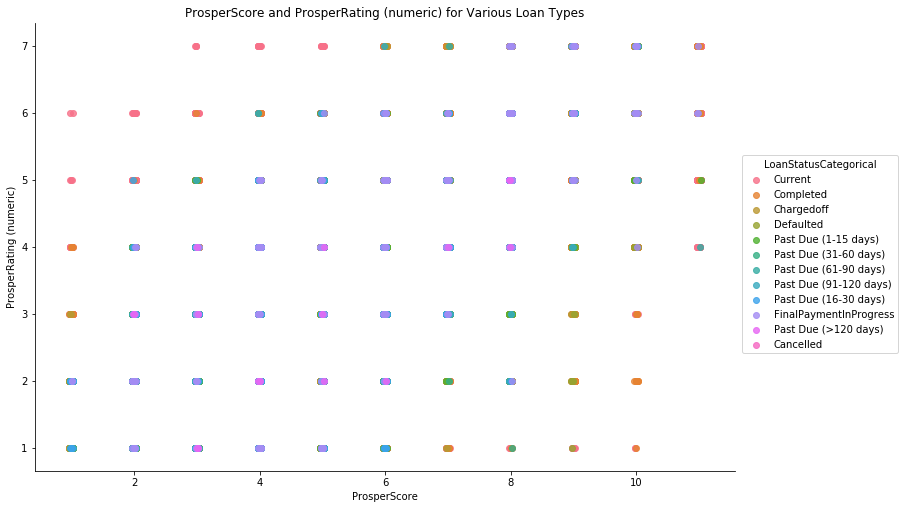

In [5]:
# Getting the index of 'LoanStatus and storing it into a variable loan_status'
df['LoanStatus'].value_counts().index
loan_status = ['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled']

# Genrating 'LoanStatusCategorical' categorical values based on LoanStatus
loan_status_categorical = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status)
df['LoanStatusCategorical'] = df['LoanStatus'].astype(loan_status_categorical)

# Making use of FacetGrid to plot ProsperScore, ProsperRating (numeric), and LoanStatusCategorical

g = sb.FacetGrid(data = df, hue = 'LoanStatusCategorical', size = 7, aspect = 1.5)
g.map(sb.regplot, 'ProsperScore', 'ProsperRating (numeric)', x_jitter = 0.03, fit_reg = False);
g.add_legend()
plt.xlabel('ProsperScore')
plt.ylabel('ProsperRating (numeric)');
plt.title("ProsperScore and ProsperRating (numeric) for Various Loan Types");

## (Visualization 4)

> Make use of pairgrid and heatmap for plotting muliple variables
> The variables of interest are ProsperScore, ProsperRating (numeric), 'Term', 'ListingCategory (numeric)'


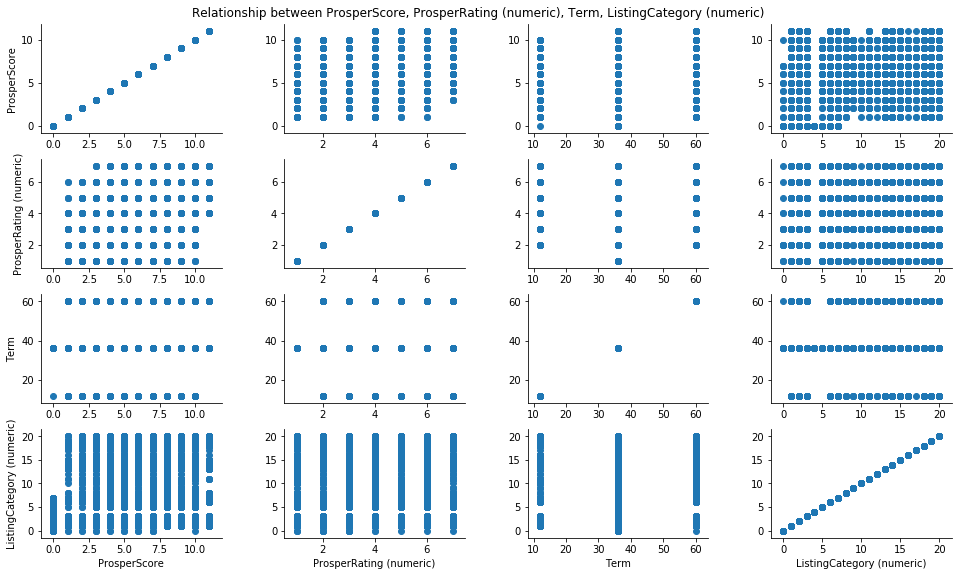

In [6]:
# Using PairGrid to see the relationship between columns 'ProsperScore' 'ProsperRating (numeric)', 'Term',
# 'ListingCategory (numeric)'

variables = ['ProsperScore', 'ProsperRating (numeric)', 'Term', 'ListingCategory (numeric)']
g = sb.PairGrid(data = df, vars = variables)
g= g.map(plt.scatter)
g.fig.set_size_inches(14, 8)

# Refernce material to set the title 
# https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot)

g.fig.subplots_adjust(top = 0.95)
g.fig.suptitle('Relationship between ProsperScore, ProsperRating (numeric), Term, ListingCategory (numeric)');

# plt.tight_layout() # Using this will clutter the title
# g.map_diag(plt.hist); # This results in value error 

In [7]:
df[variables].corr()

,ProsperScore,ProsperRating (numeric),Term,ListingCategory (numeric)
ProsperScore,1.000000,0.705221,0.229886,0.174836
ProsperRating (numeric),0.705221,1.000000,0.079179,-0.094474
Term,0.229886,0.079179,1.000000,0.004947
ListingCategory (numeric),0.174836,-0.094474,0.004947,1.000000


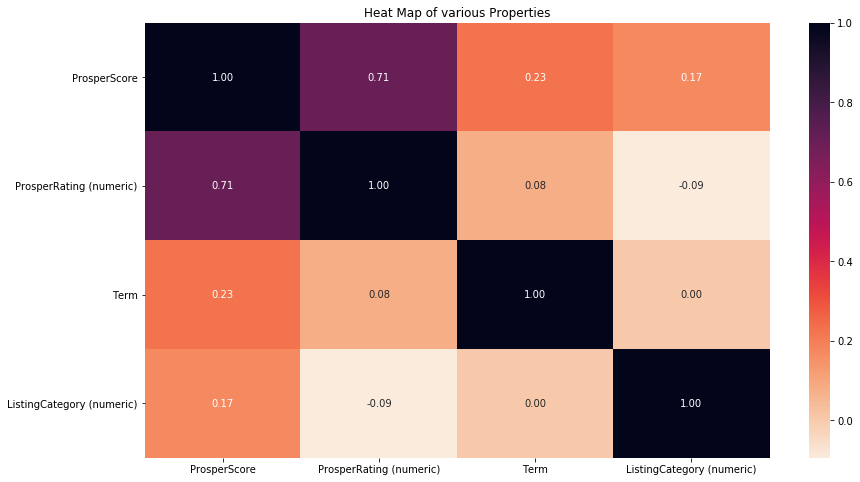

In [8]:
plt.figure(figsize=[14,8])

# Plotting the Heat Map of PrsoperScore, 'prosperRating (numeric), 'Term', 'LoanCategory (numeric)'

plt.title("Heat Map of various Properties");
sb.heatmap(df[variables].corr(), cmap='rocket_r', annot = True, fmt = '.2f');
# There is slight change in heatmap values

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
# ! jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

In [10]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 477603 bytes to Part_II_slide_deck_template.slides.html


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
